In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
trainingdata = pd.read_csv("trainingdata.csv",header=None)
validationdata1 = pd.read_csv("validationdata1.csv",header=None)
validationdata2 = pd.read_csv("validationdata2.csv",header=None)

In [3]:
trainingdata.shape

(200, 3)

In [4]:
faulty  = trainingdata[trainingdata[2] == 1]
normal  = trainingdata[trainingdata[2] == -1]

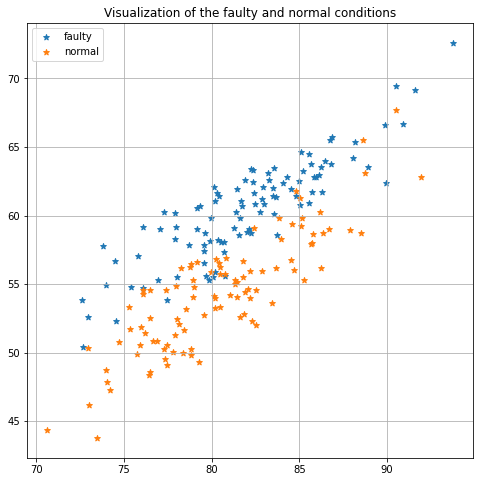

In [131]:
fig = plt.figure(figsize=(8,8))
plt.scatter(faulty[0],faulty[1],marker='*',label='faulty')
plt.scatter(normal[0], normal[1], marker = '*',label = 'normal')
plt.title('Visualization of the faulty and normal conditions')
plt.grid(True)
plt.legend()
plt.show()

## Decision with Maximum likelihood rule and Gaussian class hypothesis

In [6]:
# find the mean of the data for both faulty and normal data  
m1 = np.mean(faulty.iloc[:,0:2])
m2 = np.mean(normal.iloc[:,0:2])

In [7]:
m1 , m2

(0    81.969205
 1    60.404890
 dtype: float64,
 0    80.448923
 1    54.403710
 dtype: float64)

In [8]:
#build the covariance matrix
s1 = np.cov(faulty.iloc[:,0:2],rowvar=False) 
s2 = np.cov(normal.iloc[:,0:2],rowvar=False)

In [9]:
s1 , s2

(array([[18.74918748, 14.11957357],
        [14.11957357, 13.99872364]]),
 array([[17.66827971, 15.11477251],
        [15.11477251, 17.69416759]]))

In [81]:
def probfault(X, meanX, covX):
    d  = X.shape[0]
    frac1 = 1/((2*np.pi)**(d/2) * np.sqrt(np.linalg.det(covX)))
    prob = frac1 * np.exp((-1/2) * np.matmul(np.matmul((X - meanX).T , np.linalg.inv(covX)), (X - meanX)))
    return prob

In [120]:
pF = []
pN = []
decision = []
for i in range(validationdata1.shape[0]):
    pF = probfault(validationdata1.iloc[i,0:2].T , m1.T, s1)
    pN = probfault(validationdata1.iloc[i,0:2].T , m2.T, s2)
        
    if pF <= pN :
        decision.append(-1)
    else:
        decision.append(1)
decision = pd.DataFrame(decision)

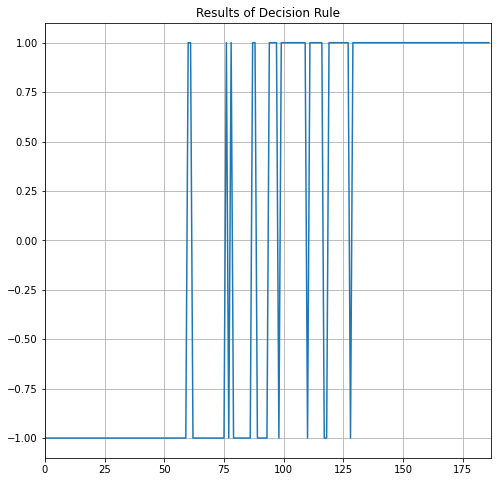

In [130]:
fig = plt.figure(figsize=(8,8))
plt.plot(decision)
plt.xlim(0,len(decision))
plt.grid(True)
plt.title("Results of Decision Rule")
plt.show()

In [127]:
# confusion matrix

from sklearn.metrics import confusion_matrix
mcm = confusion_matrix(validationdata1[2], decision)
print(mcm)

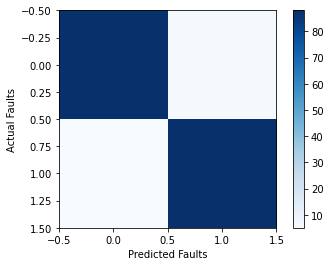

In [129]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Predicted Faults")
plt.ylabel("Actual Faults")
plt.show()

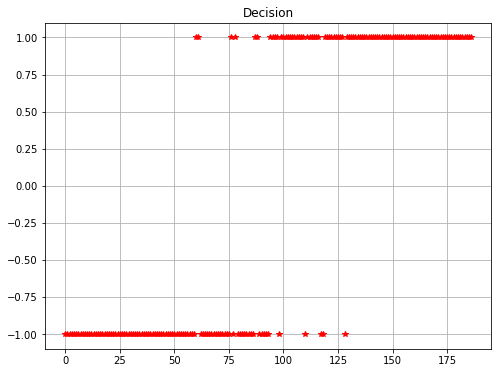

In [137]:
#Plot the results of the decision algorithm
fig = plt.figure(figsize=(8,6))
plt.plot(decision,'r*')
plt.title("Decision")
plt.grid(True)
plt.show()

/Users/edwardquarm/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


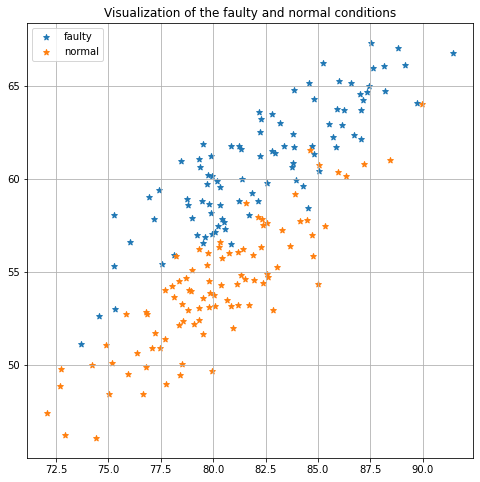

In [138]:
#plot the validation dataset

faulty2  = validationdata1[validationdata1[2] == 1]
normal2  = validationdata1[validationdata2[2] == -1]

fig = plt.figure(figsize=(8,8))
plt.scatter(faulty2[0],faulty2[1],marker='*',label='faulty')
plt.scatter(normal2[0], normal2[1], marker = '*',label = 'normal')
plt.title('Visualization of the faulty and normal conditions')
plt.grid(True)
plt.legend()
plt.show()

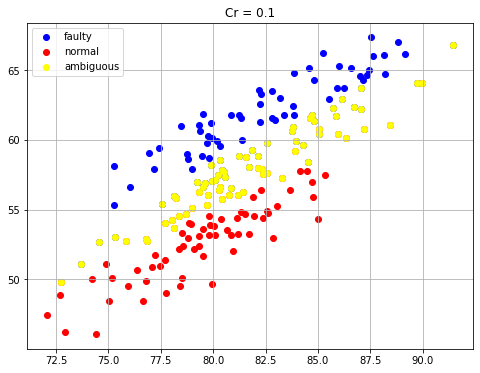

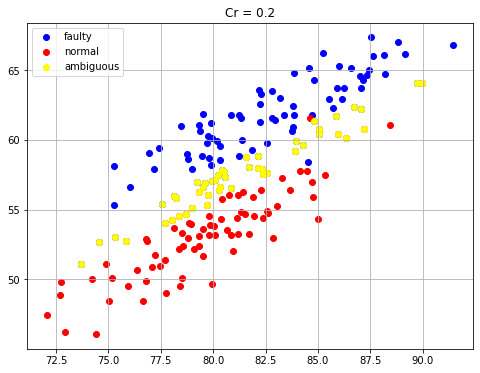

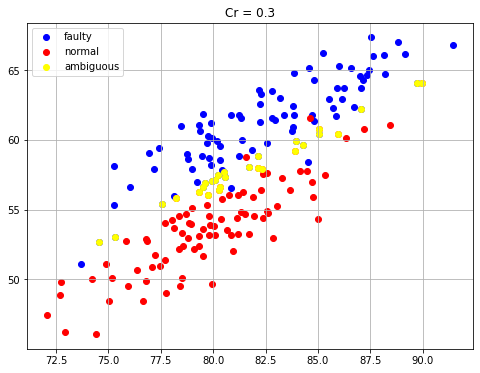

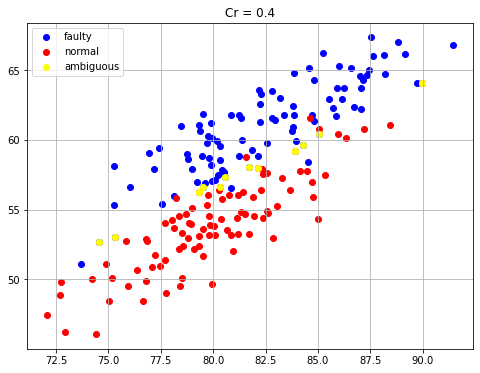

In [218]:
PF = []
PN = []

Cr = [0.1, 0.2, 0.3, 0.4]
#Cr = [0.1]
for it in Cr:
    decision2 = []
    J = []
    for i in range(validationdata1.shape[0]):
    #for i in range(0,2):
        pF = probfault(validationdata1.iloc[i,0:2].T , m1.T, s1)
        pN = probfault(validationdata1.iloc[i,0:2].T , m2.T, s2)
        #print(i)
        #print(pF,pN)
        PF = pF / (pF + pN)
        PN = pN / (pF + pN)
        #print(PF,PN)
        
        if np.maximum(PF, PN) < 1 - it:
            decision2.append(0)
            J.append(i)
            #print(i, 1-it,np.maximum(pF, round(pN, 2)),decision2,J)
            
        elif pF <= pN :
            decision2.append(-1)
        else:
            decision2.append(1)
    
    figure = plt.figure(figsize=(8,6))
    plt.title('Cr = ' + str(it))
    plt.scatter(faulty2[0],faulty2[1],color = 'blue', label='faulty')
    plt.scatter(normal2[0], normal2[1], color = 'red',label = 'normal')
    plt.scatter(validationdata1.iloc[J,0], validationdata1.iloc[J,1], color = 'yellow', label = 'ambiguous')
    plt.grid(True)
    plt.legend()
plt.show()


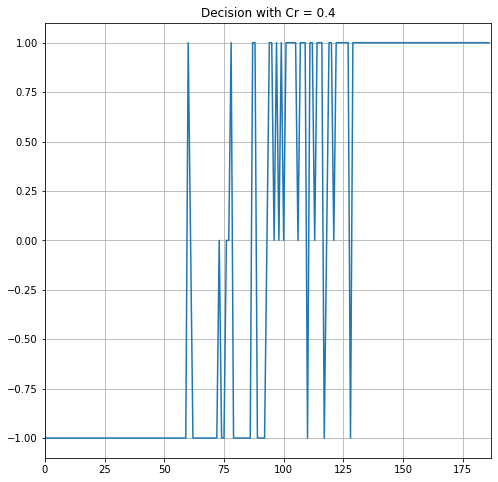

In [219]:
fig = plt.figure(figsize=(8,8))
plt.plot(decision2)
plt.xlim(0,len(decision2))
plt.grid(True)
plt.title("Decision with Cr = 0.4")
plt.show()

In [ ]:
#Distance Rejection
